## Result Analysis

In [67]:
import os
import numpy as np
from math import pi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [118]:
df = pd.read_csv(os.path.join('..','data','scores','fullDatasetResults.csv'))
df_kaggle = pd.read_csv(os.path.join('..','data','scores','kaggleDatasetResults.csv'))

df['Kaggle Score'] = df_kaggle['Accuracy']
df

,Dataset,Model,Accuracy,F1 Score,Kaggle Score
0,1,Random Forest,0.770992,0.705882,0.69856
1,1,SVM,0.755725,0.700935,0.76555
2,1,Naive Bayes,0.744275,0.676329,0.75358
3,1,Decision Tree,0.740458,0.660000,0.67703
4,1,Logistic Regression,0.778626,0.718447,0.76076
5,2,Random Forest,0.805344,0.751220,0.69856
6,2,SVM,0.828244,0.780488,0.77272
7,2,Naive Bayes,0.816794,0.769231,0.75119
8,2,Decision Tree,0.778626,0.718447,0.69856
9,2,Logistic Regression,0.839695,0.790000,0.76315


#### Distribution Plot

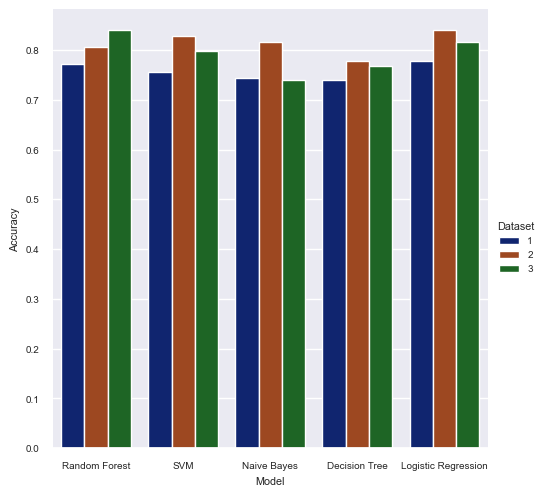

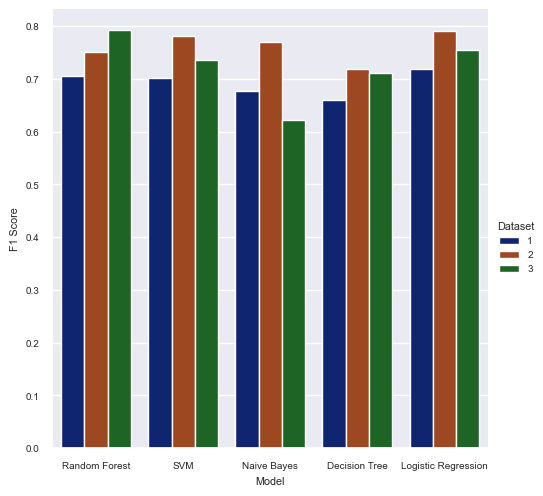

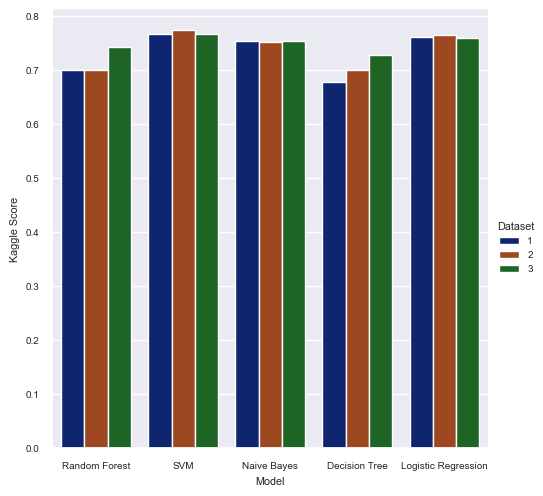

In [24]:
for feature in ['Accuracy','F1 Score','Kaggle Score']:
    
    g = sns.catplot(
        data=df, kind="bar",
        x="Model", y=feature, hue="Dataset",
        ci="sd", palette="dark"
    )

    sns.set(font_scale = 0.65)

    g.despine(left=True)
    g.set_axis_labels("Model", feature)
    plt.show()
    fig = g.fig
    fig.savefig(os.path.join('..','plots','ModelxFeaturexDataset',f'Modelx{feature}xDataset.png')) 



#### Which algorithms performed the best?

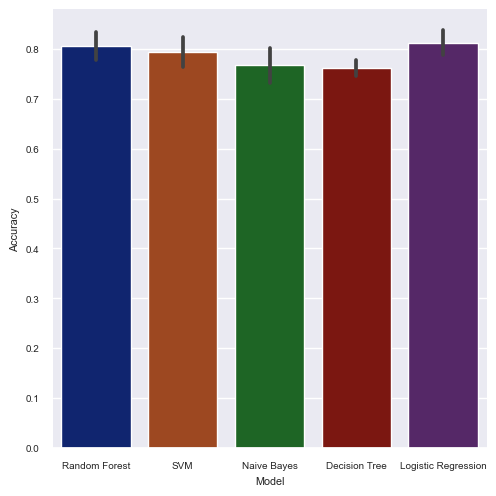

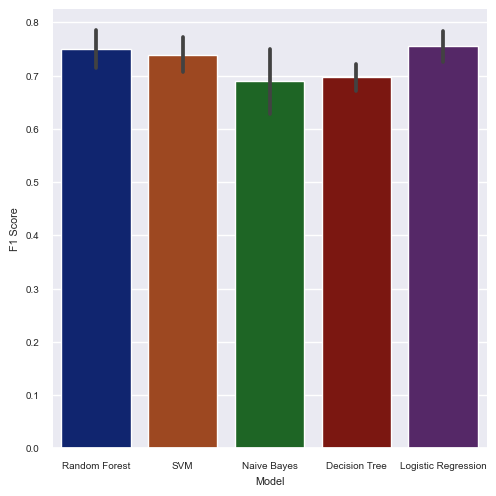

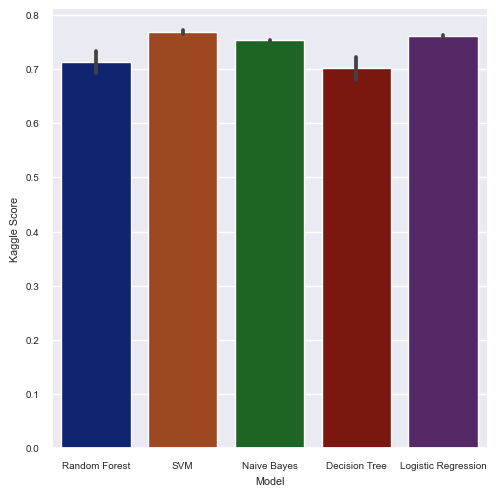

In [23]:
for feature in ['Accuracy','F1 Score','Kaggle Score']:
    
    g = sns.catplot(
        data=df, kind="bar",
        x="Model", y=feature,
        ci="sd", palette="dark"
    )

    sns.set(font_scale = 0.65)

    g.despine(left=True)
    g.set_axis_labels("Model", feature)
    plt.show()
    fig = g.fig
    fig.savefig(os.path.join('..','plots','ModelxFeature',f'Modelx{feature}.png')) 



### Average accuracy per dataset across all models

In [43]:
np.mean(df[df['Dataset'] == 2]['Accuracy'])

0.8137404580152671

In [44]:
acc_1 = np.mean(df[df['Dataset'] == 1]['Accuracy'])
acc_2 = np.mean(df[df['Dataset'] == 2]['Accuracy'])
acc_3 = np.mean(df[df['Dataset'] == 3]['Accuracy'])

f1_1 = np.mean(df[df['Dataset'] == 1]['F1 Score'])
f1_2 = np.mean(df[df['Dataset'] == 2]['F1 Score'])
f1_3 = np.mean(df[df['Dataset'] == 3]['F1 Score'])

kaggle_1 = np.mean(df[df['Dataset'] == 1]['Kaggle Score'])
kaggle_2 = np.mean(df[df['Dataset'] == 2]['Kaggle Score'])
kaggle_3 = np.mean(df[df['Dataset'] == 3]['Kaggle Score'])

d1 = [acc_1, f1_1, kaggle_1]
d2 = [acc_2, f1_2, kaggle_2]
d3 = [acc_3, f1_3, kaggle_3]

dataset = ['1','2','3']

pd.DataFrame([d1,d2,d3],index=[1,2,3], columns=['Accuracy','F1 Score','Kaggle Score'])


,Accuracy,F1 Score,Kaggle Score
1,0.758015,0.692318,0.731096
2,0.813740,0.761877,0.736836
3,0.792366,0.723324,0.749278


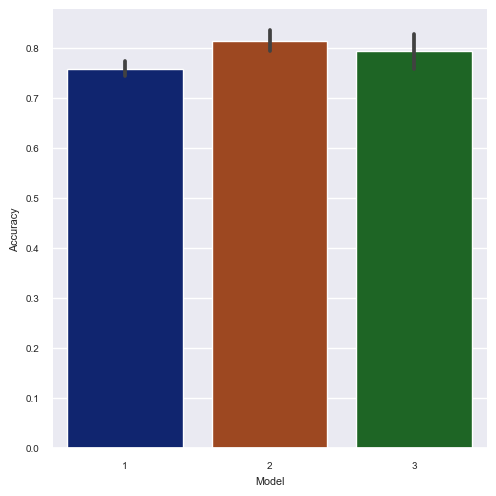

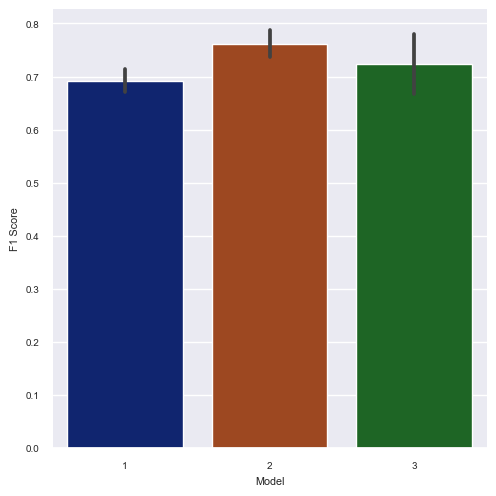

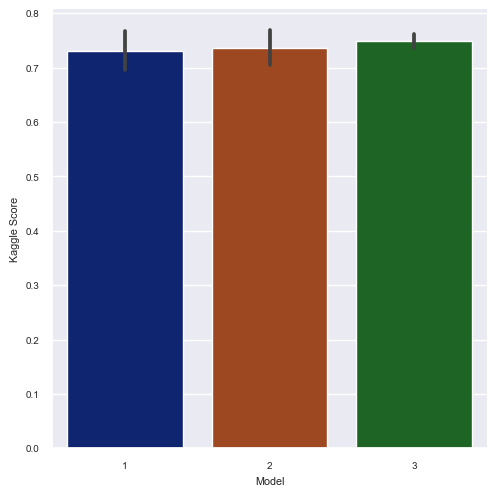

In [32]:
for feature in ['Accuracy','F1 Score','Kaggle Score']:
    
    g = sns.catplot(
        data=df, kind="bar",
        x="Dataset", y=feature,
        ci="sd", palette="dark"
    )

    sns.set(font_scale = 0.65)

    g.despine(left=True)
    g.set_axis_labels("Model", feature)
    plt.show()
    fig = g.fig
    fig.savefig(os.path.join('..','plots','DatasetxFeature',f'Datasetx{feature}.png')) 


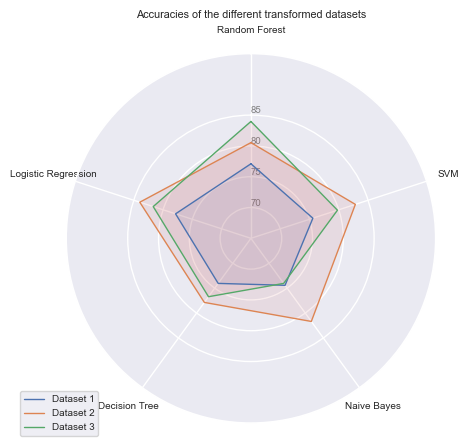

In [204]:
d1 = [0]+list(df[df['Dataset']==1]['Accuracy'])
d2 = [0]+list(df[df['Dataset']==2]['Accuracy'])
d3 = [0]+list(df[df['Dataset']==3]['Accuracy'])

df_norm = pd.DataFrame([d1,d2,d3],columns=['Dataset','Random Forest','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
df_norm = df_norm.apply(lambda x: x*100 - 65)
df_norm['Dataset'] = [1,2,3]

# number of variable
categories=list(df_norm)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]


# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([5,10,15,20], ["70","75","80","85"], color="grey", size=7)
plt.ylim(0,30)
 

values=df_norm.loc[0].drop('Dataset').values.flatten().tolist()
values += values[:1]

ax.plot(angles, values, linewidth=1, linestyle='solid', label="Dataset 1")
ax.fill(angles, values, 'b', alpha=0.1)
 

values=df_norm.loc[1].drop('Dataset').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Dataset 2")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind2
values=df_norm.loc[2].drop('Dataset').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Dataset 3")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Accuracies of the different transformed datasets')

plt.savefig(os.path.join('..','plots','ModelxDatasetxFeature',f'ModelxDatasetxAccuracy.png')) 
plt.show()

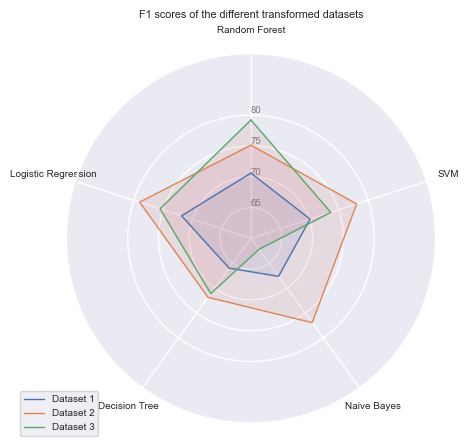

In [205]:
d1 = [0]+list(df[df['Dataset']==1]['F1 Score'])
d2 = [0]+list(df[df['Dataset']==2]['F1 Score'])
d3 = [0]+list(df[df['Dataset']==3]['F1 Score'])

df_norm = pd.DataFrame([d1,d2,d3],columns=['Dataset','Random Forest','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
df_norm = df_norm.apply(lambda x: x*100 - 60)
df_norm['Dataset'] = [1,2,3]

# number of variable
categories=list(df_norm)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]


# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([5,10,15,20], ["65","70","75","80"], color="grey", size=7)
plt.ylim(0,30)
 

values=df_norm.loc[0].drop('Dataset').values.flatten().tolist()
values += values[:1]

ax.plot(angles, values, linewidth=1, linestyle='solid', label="Dataset 1")
ax.fill(angles, values, 'b', alpha=0.1)
 

values=df_norm.loc[1].drop('Dataset').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Dataset 2")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind2
values=df_norm.loc[2].drop('Dataset').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Dataset 3")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('F1 scores of the different transformed datasets')

plt.savefig(os.path.join('..','plots','ModelxDatasetxFeature',f'ModelxDatasetxF1.png')) 
plt.show()

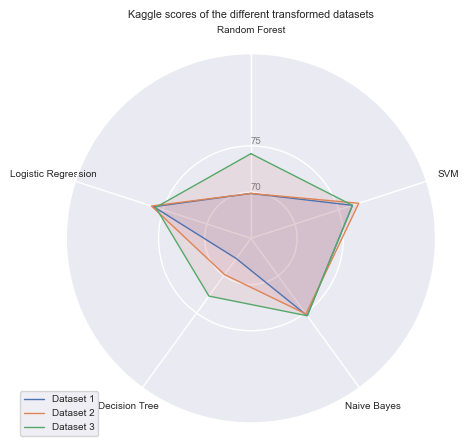

In [203]:
d1 = [0]+list(df[df['Dataset']==1]['Kaggle Score'])
d2 = [0]+list(df[df['Dataset']==2]['Kaggle Score'])
d3 = [0]+list(df[df['Dataset']==3]['Kaggle Score'])

df_norm = pd.DataFrame([d1,d2,d3],columns=['Dataset','Random Forest','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
df_norm = df_norm.apply(lambda x: x*100 - 65)
df_norm['Dataset'] = [1,2,3]

# number of variable
categories=list(df_norm)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]


# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([5,10], ["70","75"], color="grey", size=7)
plt.ylim(0,20)
 

values=df_norm.loc[0].drop('Dataset').values.flatten().tolist()
values += values[:1]

g = ax.plot(angles, values, linewidth=1, linestyle='solid', label="Dataset 1")
ax.fill(angles, values, 'b', alpha=0.1)
 

values=df_norm.loc[1].drop('Dataset').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Dataset 2")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind2
values=df_norm.loc[2].drop('Dataset').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Dataset 3")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Kaggle scores of the different transformed datasets')

plt.savefig(os.path.join('..','plots','ModelxDatasetxFeature',f'ModelxDatasetxKaggle.png')) 
plt.show()